In [2]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from soilgasflux_fcs import json_reader, models, metrics
import xarray as xr



/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
expected_ds = xr.open_dataset('./output/expected_synthetic_data62_2024-11-20.nc')
expected_ds

/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset> Size: 365kB
Dimensions:       (time: 1620, cutoff: 16)
Coordinates:
  * time          (time) datetime64[ns] 13kB 2024-11-20T00:11:27 ... 2024-11-...
  * cutoff        (cutoff) int32 64B 20 30 40 50 60 70 ... 130 140 150 160 170
Data variables: (12/13)
    dcdt(HM)      (time, cutoff) float64 207kB ...
    deadband      (time) int64 13kB ...
    d_intensity   (time) int64 13kB ...
    d_startpoint  (time) int64 13kB ...
    add_noise     (time) bool 2kB ...
    c0            (time) int64 13kB ...
    ...            ...
    cs            (time) float64 13kB ...
    pressure      (time) float64 13kB ...
    temperature   (time) float64 13kB ...
    humidity      (time) float64 13kB ...
    area          (time) float64 13kB ...
    volume        (time) float64 13kB ...

In [4]:
np.unique(expected_ds['d_startpoint'])

array([  0,  20,  30,  40,  50,  90, 100, 110, 150])

In [5]:
np.unique(expected_ds['d_intensity'])

array([-20, -10,  -5])

In [6]:
np.unique(expected_ds['alpha'])

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 ])

In [19]:
np.unique(expected_ds['cs']), np.unique(expected_ds['c0'])

(array([1000.]), array([430]))

In [17]:
np.unique(expected_ds['pressure']), np.unique(expected_ds['temperature']), np.unique(expected_ds['humidity'])

(array([99000.]), array([20.]), array([70.]))

In [18]:
expected_ds

<xarray.Dataset> Size: 365kB
Dimensions:       (time: 1620, cutoff: 16)
Coordinates:
  * time          (time) datetime64[ns] 13kB 2024-11-20T00:11:27 ... 2024-11-...
  * cutoff        (cutoff) int32 64B 20 30 40 50 60 70 ... 130 140 150 160 170
Data variables: (12/13)
    dcdt(HM)      (time, cutoff) float64 207kB ...
    deadband      (time) int64 13kB ...
    d_intensity   (time) int64 13kB -5 -10 -20 -5 -10 -20 ... -10 -20 -5 -10 -20
    d_startpoint  (time) int64 13kB 0 0 0 0 0 0 0 ... 150 150 150 150 150 150
    add_noise     (time) bool 2kB ...
    c0            (time) int64 13kB ...
    ...            ...
    cs            (time) float64 13kB 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
    pressure      (time) float64 13kB 9.9e+04 9.9e+04 ... 9.9e+04 9.9e+04
    temperature   (time) float64 13kB 20.0 20.0 20.0 20.0 ... 20.0 20.0 20.0
    humidity      (time) float64 13kB 70.0 70.0 70.0 70.0 ... 70.0 70.0 70.0
    area          (time) float64 13kB ...
    volume        (time) float64 13kB ...

In [28]:
df_raw = json_reader.Initializer(folderPath='../data/synthetical/data62').prepare_rawdata()

In [30]:
df_raw.head()

,datetime,datetime_utc,k30_co2,bmp_pressure,bmp_temperature,si_humidity,si_temperature,id,timedelta,alpha,c_s,c_c0,deadband,disturbance_intensity,disturbance_starting_point,add_noise
0,2024-11-20 00:11:27,2024-11-20 00:11:27,430.0,99000.0,20.0,70.0,20.0,2024-11-20_0-11-27,0,0.0001,1000.0,430,30,-5,0,True
1,2024-11-20 00:11:28,2024-11-20 00:11:28,430.0,99000.0,20.0,70.0,20.0,2024-11-20_0-11-27,1,0.0001,1000.0,430,30,-5,0,True
0,2024-11-20 00:11:28,2024-11-20 00:11:28,430.0,99000.0,20.0,70.0,20.0,2024-11-20_0-11-28,0,0.0001,1000.0,430,30,-10,0,True
2,2024-11-20 00:11:29,2024-11-20 00:11:29,430.0,99000.0,20.0,70.0,20.0,2024-11-20_0-11-27,2,0.0001,1000.0,430,30,-5,0,True
0,2024-11-20 00:11:29,2024-11-20 00:11:29,430.0,99000.0,20.0,70.0,20.0,2024-11-20_0-11-29,0,0.0001,1000.0,430,30,-20,0,True


/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_1425/3067792901.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


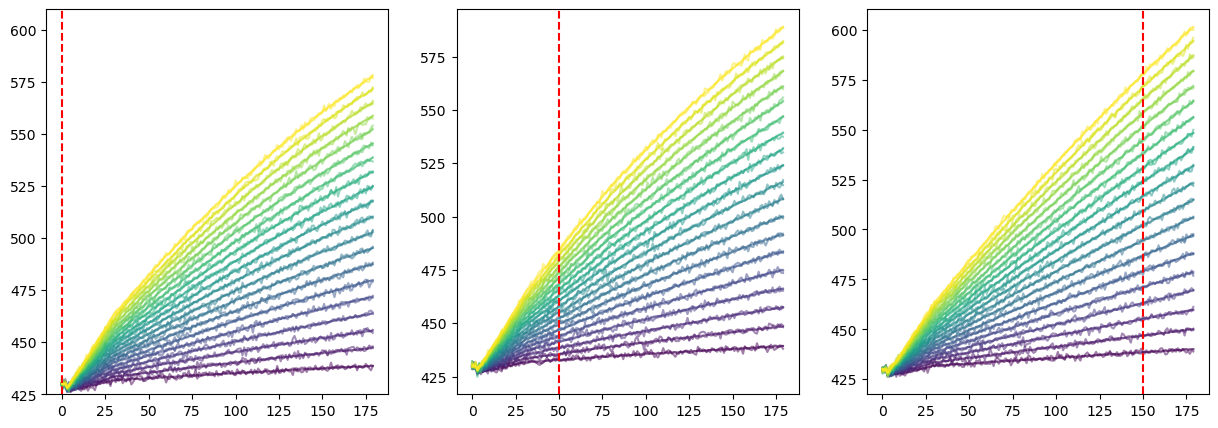

In [44]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(df_raw['alpha'].unique())))
colors_dict = dict(zip(df_raw['alpha'].unique(), colors))

for alpha in df_raw['alpha'].unique():
    df_alpha = df_raw[df_raw['alpha']==alpha]
    for i in df_alpha['id'].unique():
        df0 = df_raw[(df_raw['id']==i)&
                    (df_raw['alpha']==alpha)&
                    (df_raw['disturbance_starting_point']==0)&
                    (df_raw['disturbance_intensity']==-10)]
        df50 = df_raw[(df_raw['id']==i)&
                    (df_raw['alpha']==alpha)&
                    (df_raw['disturbance_starting_point']==50)&
                    (df_raw['disturbance_intensity']==-10)]
        df150 = df_raw[(df_raw['id']==i)&
                    (df_raw['alpha']==alpha)&
                    (df_raw['disturbance_starting_point']==150)&
                    (df_raw['disturbance_intensity']==-10)]
        
        ax[0].plot(df0['timedelta'], df0['k30_co2'], color=colors_dict[alpha],alpha=0.5)
        ax[1].plot(df50['timedelta'], df50['k30_co2'], color=colors_dict[alpha], alpha=0.5)
        ax[2].plot(df150['timedelta'], df150['k30_co2'], color=colors_dict[alpha], alpha=0.5)


ax[0].axvline(0, color='red', linestyle='--')
ax[1].axvline(50, color='red', linestyle='--')
ax[2].axvline(150, color='red', linestyle='--')

ax[0].set_ylim((425, 610))

fig.show()